## Profit and Loss of the Black-Scholes hedging

In [383]:
# import
import numpy as np
import matplotlib.pyplot as plt

In [384]:
# parameters
S_0 = 100
T= 2
σ_0 = 0.2
λ = 2
c = 0.4
γ = 0.3
r = 0.02
M = 1000
n = 1000


### 1 simulate and display M samples of $σ_t$

We are simutating the Ornstein-Uhlenbeck process 
$\newline dσ_{t} = λ(c-σ_{t})dt + λdW_{t}^{(2)} $
$\newline With ~a~ discrete ~time~ solution:$
$\newline σ_{t_{i}^{n}} = c + (σ_{0} - c)e^{-λt_{i}^{n}} + γ\sum_{j = 1}^{i}e^{-λ(t_{i}^{n} - t_{j-1}^{n})}(W_{t_{j}^{n}}^{(2)} - W_{t_{j-1}^{n}}^{(2)} ) $

In [385]:
def sigma(c, σ_0, λ, γ,T, M, n): # return M simulations of σ_i ...
    Δt = T/n
    np.random.seed(10**7)
    ΔW = np.zeros((n, M))
    ΔW[1:] = np.sqrt(Δt)*np.random.randn(n-1, M)
    time = np.expand_dims( np.linspace(0,T, n, endpoint= True),axis = 1)
    time_new = np.zeros(time.shape)
    time_new[1:] = time[:-1]
    result = c + ((σ_0 - c) + γ*np.cumsum(np.exp(λ*(time_new))*ΔW, axis= 0))*np.exp(-λ*time)
    return result

In [386]:
# display fonction 
def show(time, path, c, σ_0):
    plt.figure(figsize=(10,8), dpi=100)
    for i in range(4):
        plt.plot(time, path[:,i], linewidth=.7)
    plt.xlabel('Time $t$')
    plt.ylabel('Volatility $\sigma_t$')
    plt.axhline(σ_0 , time.min(), time.max(), c='blue', linewidth=.7, linestyle='-.', label="Start value $\sigma_0$")
    plt.axhline(c, time.min(), time.max(), c='green', linewidth=.7, linestyle='--', label="Long-term mean $c$")
    plt.legend()
    plt.title('Ornstein-Uhlenbeck $\sigma_t$')

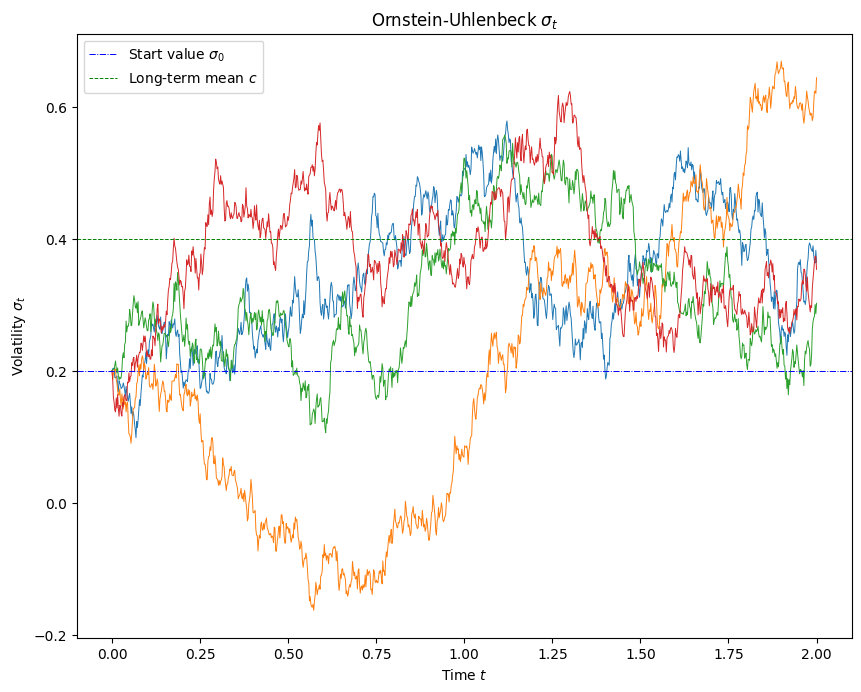

In [387]:
# Display representation path

path = sigma(c, σ_0, λ, γ, T, M, n)

# I will just represent one simutation

time = np.linspace(0,T, n, endpoint= True)

# show
show(time, path, c, σ_0)



### Comment

>>> We can see that the paths oscillate at long term around $c$

### 2 Simulate and display some representative path and coresponding histogramme for $S_t$

The discret representation of $S_t$ will be make as follows: 
$\newline S_{t_{i}^{n}} = S_{0}e^{\frac{-1}{2}\sum_{j = 1}^{i}σ_{t_{j-1}^{n}}^{2}(t_{j}^{n}-t_{j-1}^{n}) + \sum_{j = 1}^{i}σ_{t_{j-1}^{n}}(W_{t_{j}^{n}}-W_{t_{j-1}^{n}})} $

In [388]:
def S (S_0, c, σ_0, λ, γ,T, M, n):
    Δt = T/n
    np.random.seed(10**7)
    ΔW = np.zeros((n, M))
    ΔW[1:] = np.sqrt(Δt)*np.random.randn(n-1, M)
    sig = sigma(c, σ_0, λ, γ,T, M, n)
    sig_new = np.zeros(sig.shape)
    sig_new[1:] = sig[:n-1]
    time = np.expand_dims( np.linspace(0,T, n, endpoint= True),axis = 1)
    Δt = np.zeros((n, 1))

    Δt[1:] = time[1:] - time[:n-1]
    result = S_0*np.exp(-0.5*np.cumsum((sig_new**2)*Δt,axis = 0) + np.cumsum(sig_new*ΔW, axis= 0))
    return result

Text(0.5, 1.0, 'Ornstein-Uhlenbeck $\\S_t$')

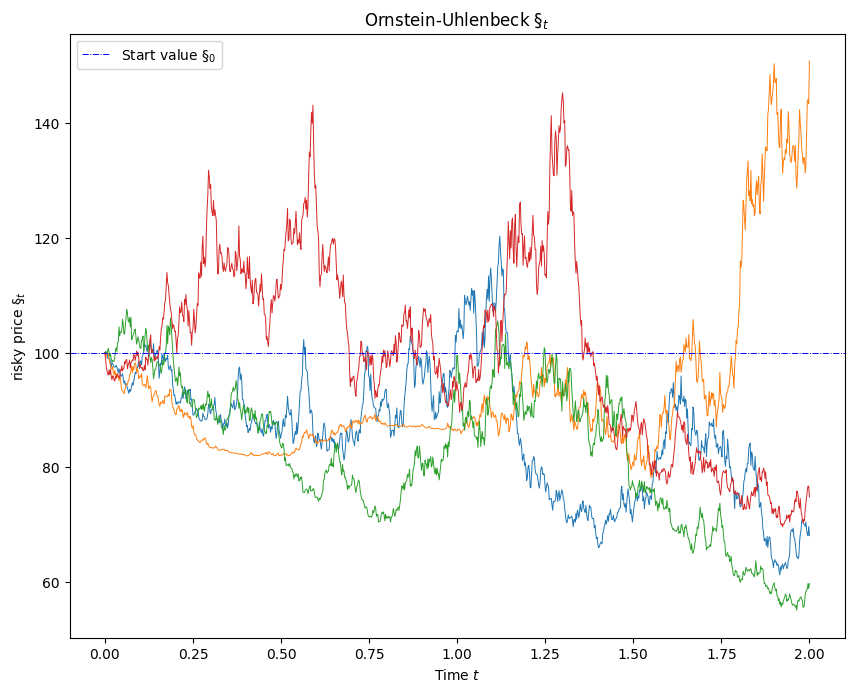

In [389]:
# Display representation path

path = S(S_0,c, σ_0, λ, γ, T, M, n)

# I will just represent one simutation

time = np.linspace(0,T, n, endpoint= True)

# plot part

plt.figure(figsize=(10,8), dpi=100)
for i in range(4):
    plt.plot(time, path[:,i], linewidth=.7)
plt.xlabel('Time $t$')
plt.ylabel('risky price $\S_t$')
plt.axhline(S_0 , time.min(), time.max(), c='blue', linewidth=.7, linestyle='-.', label="Start value $\S_0$")
#plt.axhline(c, time.min(), time.max(), c='green', linewidth=.7, linestyle='--', label="Long-term mean $c$")
plt.legend()
plt.title('Ornstein-Uhlenbeck $\S_t$')
#

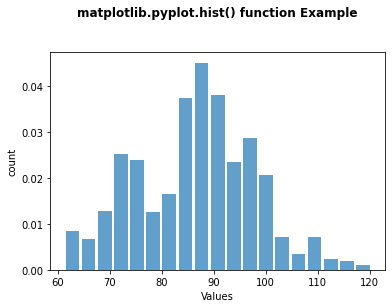

In [406]:
plt.hist(path[:,0],bins = "auto",density = 1, alpha = 0.7, rwidth= 0.85)
plt.xlabel('Values')
plt.ylabel('count')
  
plt.title('matplotlib.pyplot.hist() function Example\n\n',
          fontweight ="bold")
  
plt.show()

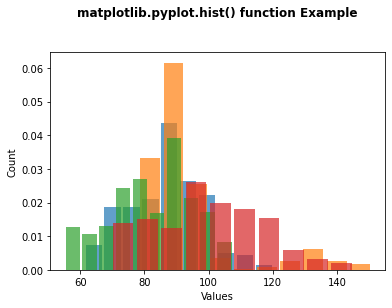

In [407]:
for i in range(4):
    plt.hist(path[:,i],density = 1, alpha = 0.7, rwidth= 0.85)
plt.xlabel('Values')
plt.ylabel('Count')
  
plt.title('matplotlib.pyplot.hist() function Example\n\n',
          fontweight ="bold")
plt.show()


### Comment 

>>> The histogram show us that the values of $S_t$ oscillate between $80~ and~ 90$ and stay under his initial value $100$

### 3 P & L

Here we will implement:
$\newline P\&L_{T}(∑) = \frac{1}{2}\sum_{i = 0}^{n-1}e^{r(T-t_{i}^{n})}(\sum^{2}-σ_{t_{i}^{n}}^{2})S_{u}^{2}Γ^{BS}(t_{i}^{n}, S_{t_{i}^{n}}, \sum)(t_{i+1}^{n}-t_{i}^{n})$

In [392]:
def Γ_BS(T, S_T, σ_0, K, r):
    d_plus = np.log(S_T/(K*np.exp(-r*T)))/(np.sqrt(T)*σ_0) + 0.5*np.sqrt(T)*σ_0
    numerator = np.exp(-(d_plus**2)/2)/(np.sqrt(2*np.pi))
    return numerator/(S_T*σ_0*np.sqrt(T))

In [393]:
def P_L(S_0, c, σ_0, λ, γ,T, M, n, K, r):
    Δt = T/n
    time = np.expand_dims( np.linspace(0,T, n, endpoint= True),axis = 1)[:-1]
    sig = sigma(c, σ_0, λ, γ,T, M, n)[:-1]
    S_T = S(S_0, c, σ_0, λ, γ,T, M, n)[:-1]
    Γ = Γ_BS(T-time, S_T, σ_0, K, r)
    return (0.5*np.sum((np.exp(-r*time))*(σ_0**2 - sig**2)*(S_T**2)*Γ,axis = 0)*np.exp(r*T))*Δt

In [394]:
# compute values
P = np.empty((6, 146, M))
for n in range(6): 
    P[n, :, :] = np.array([P_L(S_0, c, σ_0, λ, γ,T, M, n*10 + 50, K+50, r) for K in range(5, 151)]) 

In [395]:
# computation of mean
means = np.mean(P, axis= 2)

#computation of variance

var = P.std(axis = 2)

In [400]:
def affiche(K, means, var):
    plt.figure(figsize=(5,4), dpi=100)
    plt.plot(K, means, linewidth=.7)
    plt.plot(K, var, linewidth=.7)
    plt.xlabel('Time $t$')
    plt.ylabel('means and variance')
    plt.legend()
    plt.title('means and variance of P&L')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


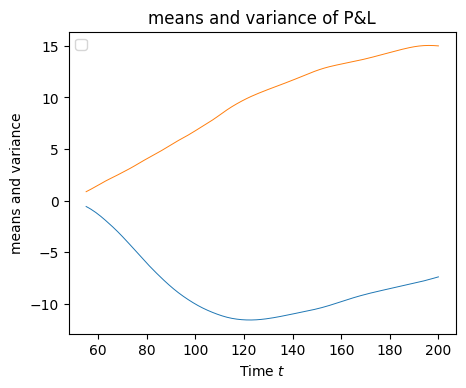

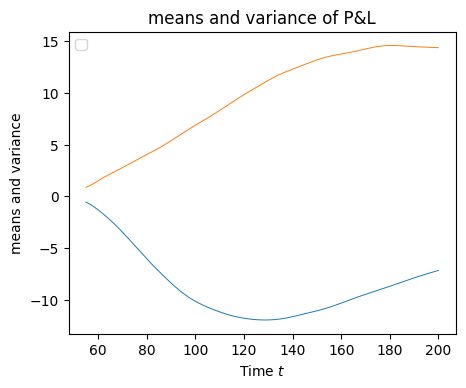

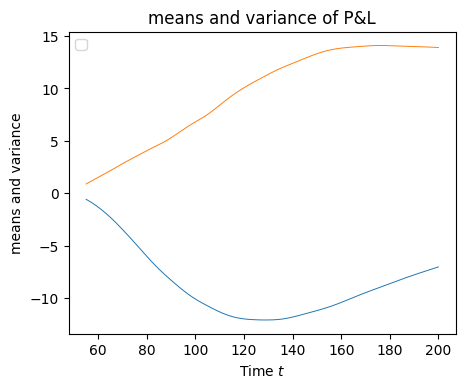

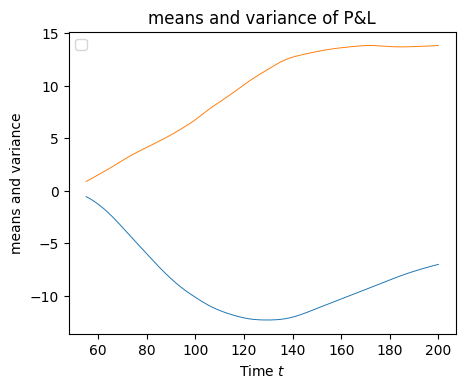

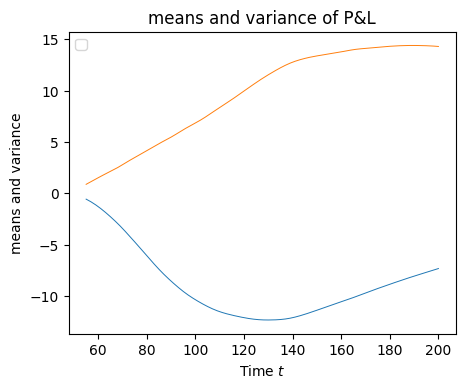

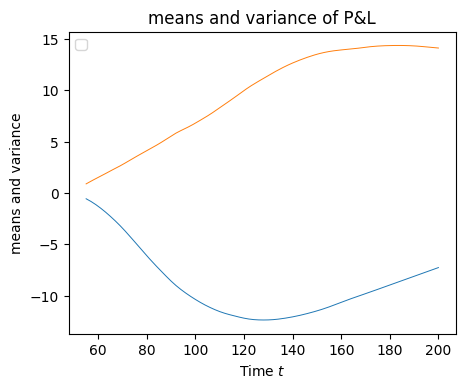

In [401]:
K = np.array(range(55,201,1))

for i in range(6):
    affiche(K, means[i], var[i])